# House Price Prediction Model
##### Objective: The objecive of this Model is to predcict the price of the house in california. As this is the learning project so we have not strict criteria or rules for accuracy of the predicted result.

##### Data and it's Source: This model is used data from the 1990 California census. this is small dataset from StatLib repository.

##### End goal: The end goal of this model is to predict a single numeric value which represent the price of the House.

##### Category: We have labled data, so this problem is belongs to supervised learning problem. as we need to predict a single numeric value this probelen is univariate regression problem

## 1. Get the Data and look at big picture
##### Fetch the data and take a quick look of the data to get roughf idea about the dataset.

In [1]:
import os 
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz") 
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path, filter='data')
    housing_tgz.close()

def get_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv") 
    return pd.read_csv(csv_path)


In [3]:
fetch_housing_data()

data = get_data()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Take a quick look at data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

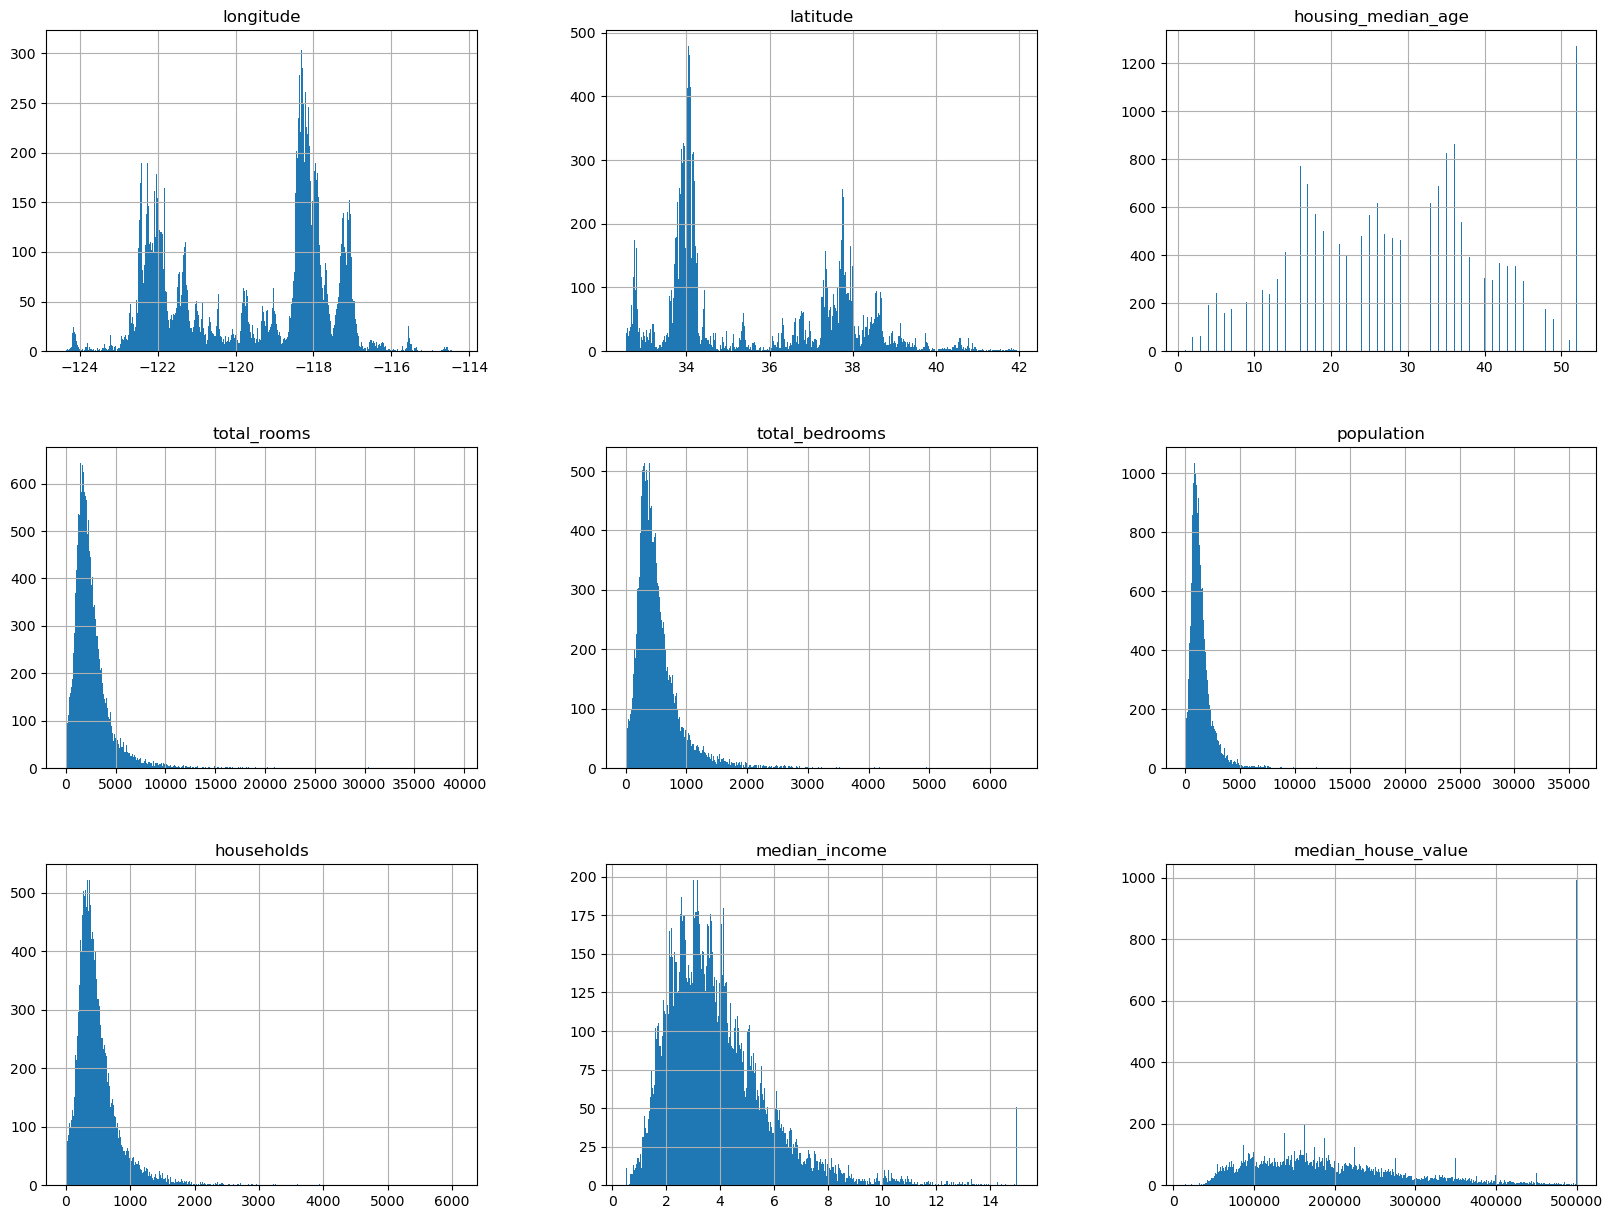

In [7]:
data.hist(bins=500, figsize=(20,15))
plt.show()

### Create a test dataset
##### this is the right time to split our data into training and testing part. and we will not touch our test data in training phase

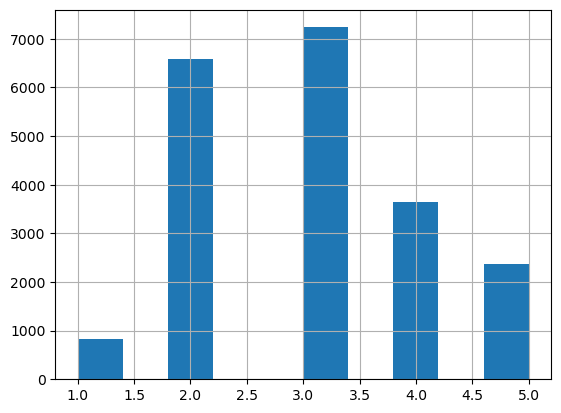

In [8]:
# we use stratified sampling to split our data

data["cat_income"] = pd.cut(data["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
data["cat_income"].hist()
plt.show()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data["cat_income"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [10]:
print(strat_train_set.shape)
print(strat_test_set.shape)

(16512, 11)
(4128, 11)


In [11]:
# let's drop the 'cat_income' column
for set_ in (strat_train_set, strat_test_set):
    set_.drop("cat_income", axis=1, inplace=True)

## 2. Discover and Visualize the data
#### Take a closer look at the train data, try to understand and gain insight

In [56]:
housing_data = strat_train_set.copy()

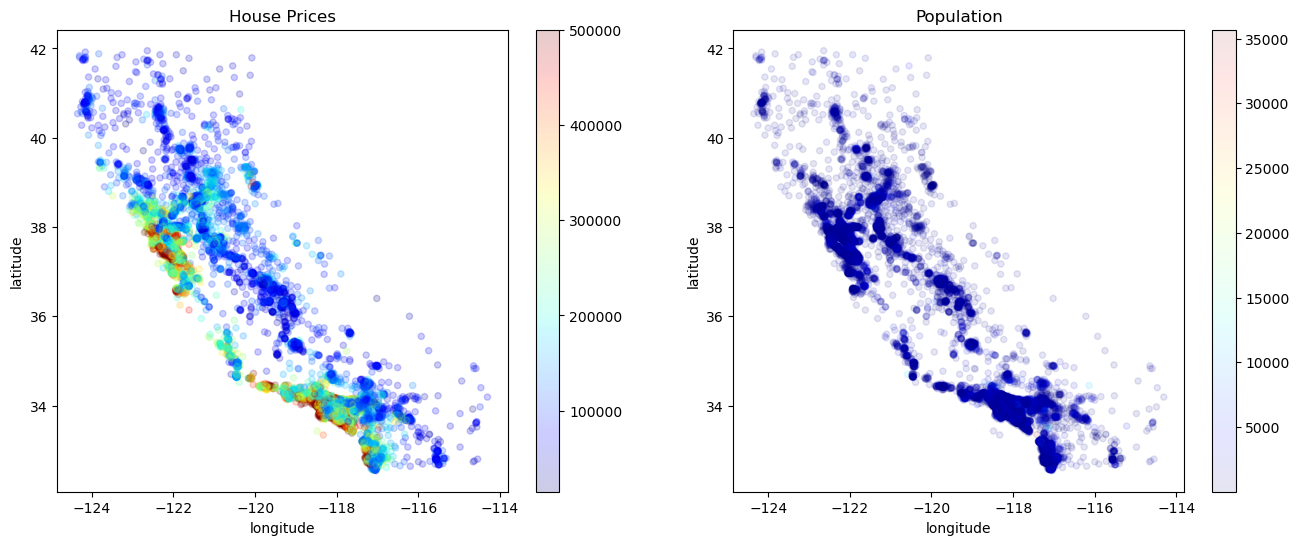

In [57]:
# median_house_value vs populatoin

fig, axis = plt.subplots(1, 2, figsize=(16, 6)) 

housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, c=housing_data["median_house_value"],cmap=plt.get_cmap('jet'), colorbar=True, ax=axis[0])
axis[0].set_title("House Prices")

housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, c=housing_data["population"],cmap=plt.get_cmap('jet'), colorbar=True, ax=axis[1])
axis[1].set_title("Population")
plt.show()

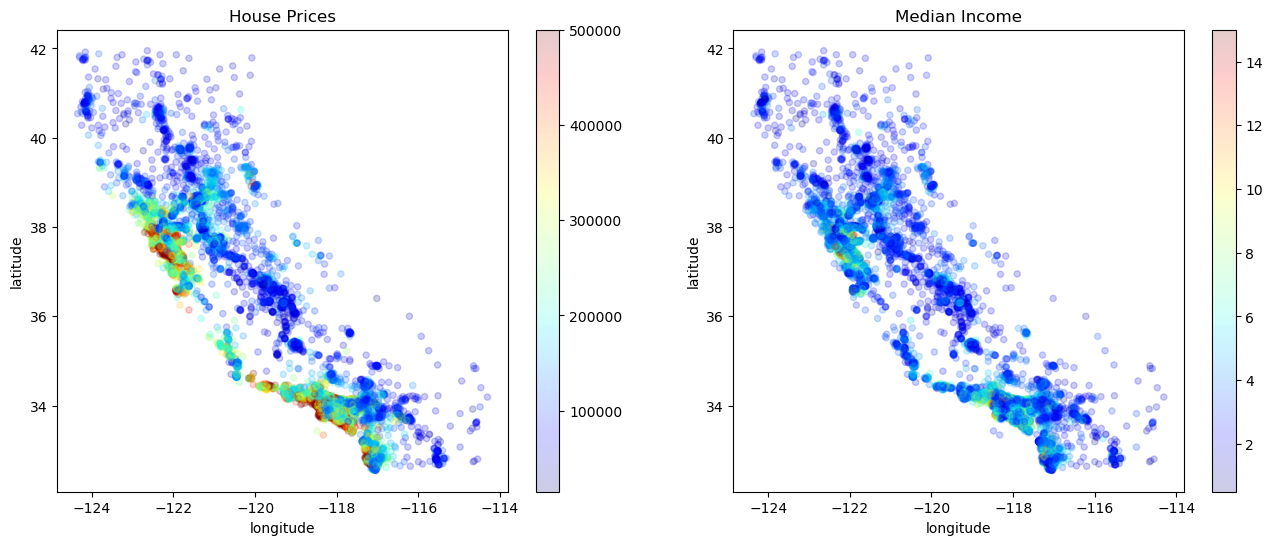

In [58]:
# median_house_value vs median_income

fig, axis = plt.subplots(1, 2, figsize=(16, 6)) 

housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, c=housing_data["median_house_value"],cmap=plt.get_cmap('jet'), colorbar=True, ax=axis[0])
axis[0].set_title("House Prices")

housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, c=housing_data["median_income"],cmap=plt.get_cmap('jet'), colorbar=True, ax=axis[1])
axis[1].set_title("Median Income")
plt.show()

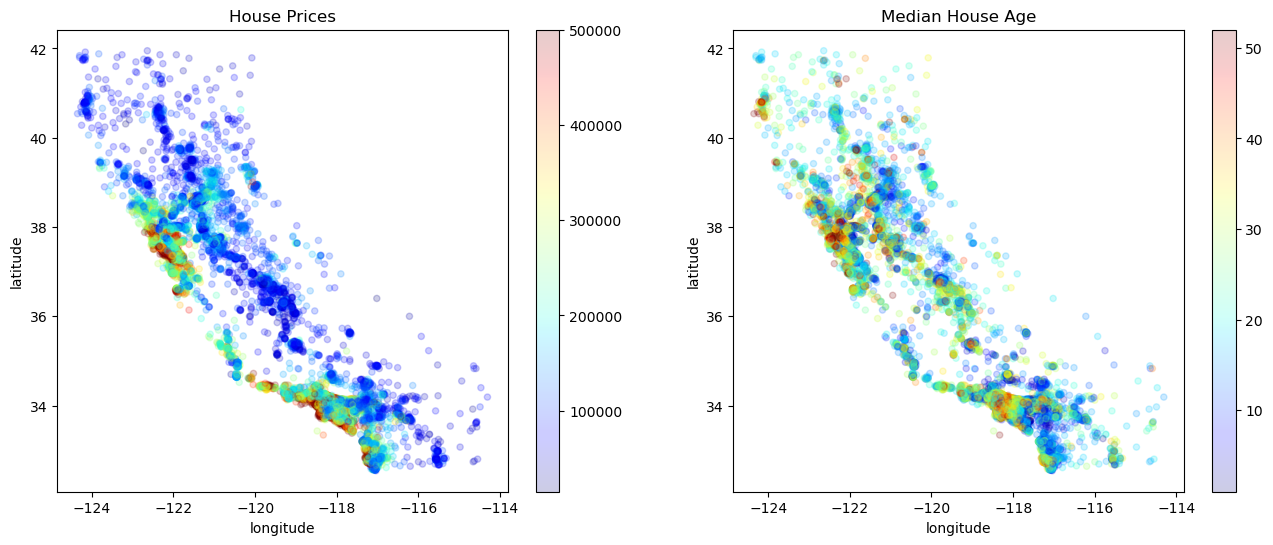

In [59]:
# median_house_value vs median_house_age 

fig, axis = plt.subplots(1, 2, figsize=(16, 6)) 

housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, c=housing_data["median_house_value"],cmap=plt.get_cmap('jet'), colorbar=True, ax=axis[0])
axis[0].set_title("House Prices")

housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, c=housing_data["housing_median_age"],cmap=plt.get_cmap('jet'), colorbar=True, ax=axis[1])
axis[1].set_title("Median House Age")
plt.show()

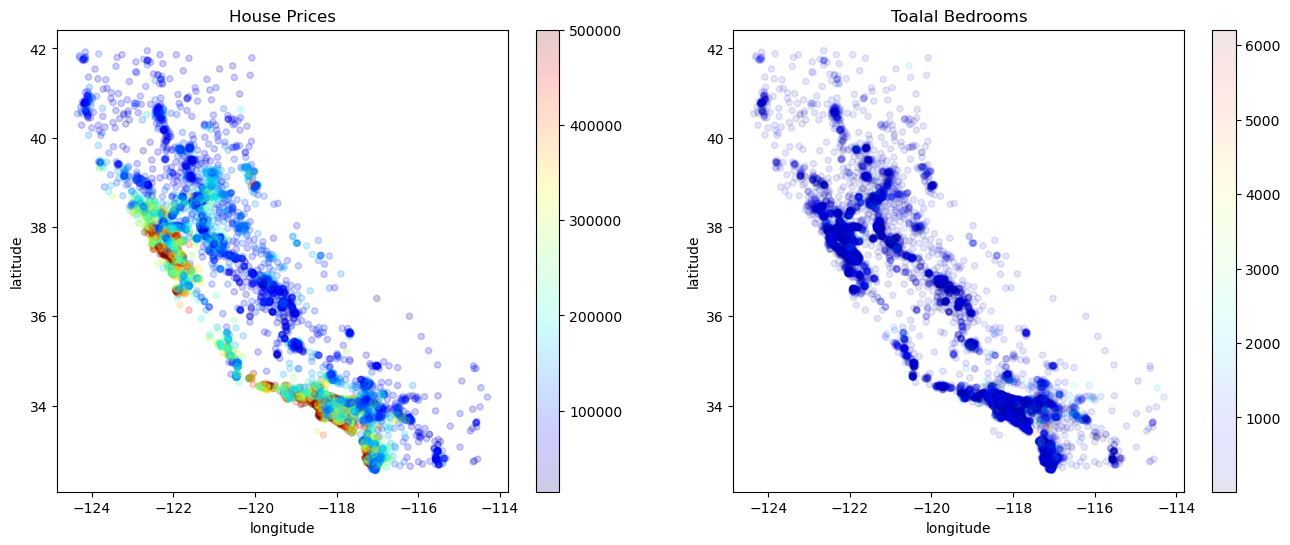

In [60]:
# median_house_value vs total_bed 

fig, axis = plt.subplots(1, 2, figsize=(16, 6)) 

housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, c=housing_data["median_house_value"],cmap=plt.get_cmap('jet'), colorbar=True, ax=axis[0])
axis[0].set_title("House Prices")

housing_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, c=housing_data["total_bedrooms"],cmap=plt.get_cmap('jet'), colorbar=True, ax=axis[1])
axis[1].set_title("Toalal Bedrooms")
plt.show()

In [61]:
# let's check the correlation, since we have small dataset we can check correlation between every pair
housing_data.drop("ocean_proximity", axis=1, inplace=True)
corr_matrix = housing_data.corr()

In [62]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

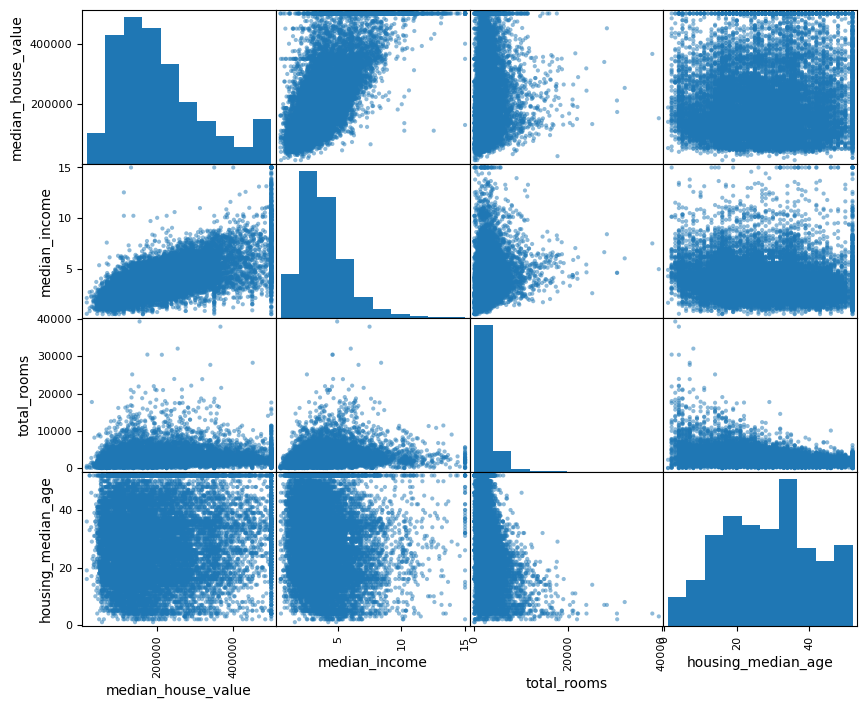

In [63]:
# let's see this relation between some fields
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing_data[attributes], figsize=(10,8))
plt.show()

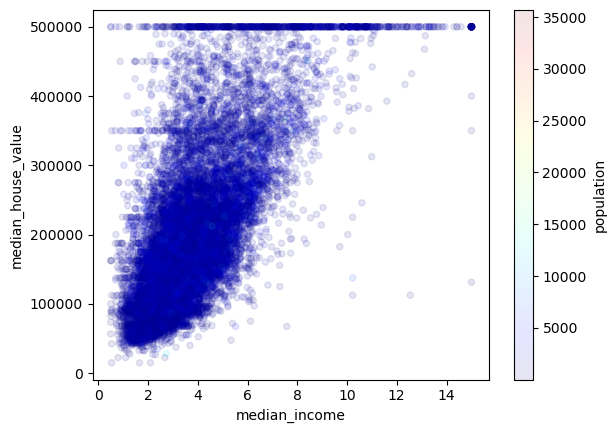

In [64]:
# the most promising feature is median_income, let's zoom it

housing_data.plot(kind='scatter', x = "median_income", y="median_house_value", alpha=0.1, c = "population", cmap=plt.get_cmap("jet"))
plt.show()

### Exprimenting with Attribute/features

In [65]:
# let's create one more feature 
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bed_rooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]

In [66]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            16512 non-null  float64
 1   latitude             16512 non-null  float64
 2   housing_median_age   16512 non-null  float64
 3   total_rooms          16512 non-null  float64
 4   total_bedrooms       16354 non-null  float64
 5   population           16512 non-null  float64
 6   households           16512 non-null  float64
 7   median_income        16512 non-null  float64
 8   median_house_value   16512 non-null  float64
 9   rooms_per_household  16512 non-null  float64
 10  bed_rooms_per_room   16354 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


In [67]:
corr_matrix = housing_data.corr()

In [68]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.687151
rooms_per_household    0.146255
total_rooms            0.135140
housing_median_age     0.114146
households             0.064590
total_bedrooms         0.047781
population            -0.026882
longitude             -0.047466
latitude              -0.142673
bed_rooms_per_room    -0.259952
Name: median_house_value, dtype: float64

## 3. Prepare the data for Machine Learning Model

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

In [70]:
# let seprate the features and labels, no need to apply the same transformation on labels.
data = strat_train_set.drop('median_house_value', axis=1)
labels = strat_train_set["median_house_value"]

In [71]:
# seprate the numerical and categorial columns for pre-processing defferently
num_data = data.drop('ocean_proximity', axis=1)
cat_data = data["ocean_proximity"]
numerical_feature = list(num_data.columns)
categorial_feature = ["ocean_proximity"]

In [72]:
# usefull classes for prrocessing the data

class RemoveFeature(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X):
        return self;
        
    def transform(self, X):
        irrelevent_feature = [4, 5, 6]
        return np.delete(X, irrelevent_feature, axis=1)

class AddFeature(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass;
        
    def fit(self, X):
        return self;

    def transform(self, X):
        # add rooms_per_household_feature
        rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        # add bedroom_per_rooms feature
        bed_rooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
        return np.c_[X, rooms_per_household, bed_rooms_per_room]
        

In [73]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('add_feature', AddFeature()),
    # ('remove_feature', RemoveFeature()),
    ('scaler', StandardScaler())
])

categorial_pipeline=Pipeline([
    ('encoder', OneHotEncoder()),
])

In [74]:
from sklearn.compose import ColumnTransformer
preprocessing_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_feature),
    ('cat', categorial_pipeline, categorial_feature),
])

processed_data = preprocessing_pipeline.fit_transform(data)
processed_data.shape

(16512, 15)

In [75]:
labels.shape

(16512,)

## 4. Choose best estimator which fit our problem using Cross_validation

In [35]:
# let's try DecisionTreeRegressir model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeRegressor()
scores = cross_val_score(decision_tree, processed_data, labels, cv=4, scoring="neg_mean_absolute_error")
scores

array([-43810.24055233, -44237.22359496, -47430.20687984, -45180.9500969 ])

In [32]:
# let's check the mean of this score list
mean_of_mean_abosolute_error = scores.mean()
abs(mean_of_mean_abosolute_error)

45515.830547480626

In [36]:
housing_data['median_house_value'].mean()

207005.32237160852

In [37]:
# let's try Linear regrssion model
from sklearn.linear_model import LinearRegression
linea_model = LinearRegression()
scores = cross_val_score(linea_model, processed_data, labels, cv=10, scoring="neg_mean_absolute_error")
scores

array([-51189.79297821, -47617.27542373, -47568.28770442, -49940.03876439,
       -48229.17504543, -51492.10197254, -50930.78861296, -50764.58752271,
       -48151.4863719 , -50823.98849182])

In [43]:
mean = abs(scores.mean())
std_score = scores.std()
print("mean ", mean)
print("std : ", std_score)

mean  49670.75228881053
std :  1511.1212303590376


In [36]:
# let's try the RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
RMR_model = RandomForestRegressor()
scores = cross_val_score(RMR_model, processed_data, labels, cv=6, scoring="neg_mean_absolute_error")
scores

array([-32708.72244186, -31616.63364826, -33218.37916061, -33233.14997456,
       -33106.68822674, -32459.67986555])

In [37]:
print("mean ", abs(scores.mean()))
print("std_scores ", scores.std())

mean  32723.8755529312
std_scores  569.5690492590156


## 5. Fine tune your model.

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=RMR_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
# grid_search.fit(processed_data, labels)

# print("Best Hyperparameters:", grid_search.best_params_)

In [76]:
# check least important features
RMR_model.fit(processed_data, labels)

RandomForestRegressor()

In [51]:
feature_importances = RMR_model.feature_importances_
np.set_printoptions(suppress=True)
print(np.sort(feature_importances))

[0.00002434 0.00088119 0.00293218 0.00637725 0.01564089 0.01622765
 0.01731985 0.02375445 0.02916373 0.03218421 0.04814343 0.09084999
 0.09886032 0.14319586 0.47444466]


## 6. Evaluate model on test set

In [77]:
# let's create a full pipeline first

Full_pipeline = Pipeline([
    ('pre_processing_data', preprocessing_pipeline),
    ('model', RMR_model),
])

In [79]:
test_x = strat_test_set.drop('median_house_value', axis=1)
test_y = strat_test_set["median_house_value"]

In [80]:
prediction_y = Full_pipeline.predict(test_x)

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_y, prediction_y)
mse = mean_squared_error(test_y, prediction_y)
rmse = np.sqrt(mse)

In [93]:
print("Mean Absolute Error is ", mae)
print("Mean Square Error is ", mse)
print("Root Mean Square Error is ", rmse)

Mean Absolute Error is  31598.461659399225
Mean Square Error is  2306019441.74438
Root Mean Square Error is  48021.031244074504


In [99]:
# let's check MAE in terms of percentage(by how much percentage my prediction is deviated)
test_y = np.array(test_y)
mape = np.mean(np.abs((test_y - prediction_y) / test_y)) * 100
mape

18.12677614341494